## Visualize simulated experiment

This notebook will make volcano plots of 3 representative simulated experiments to demonstrate what the simulation approach creates from a biological perspective (i.e. experiments created contain a similar experiment structure but different biological patterns)

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from ponyo import utils
from generic_expression_patterns_modules import plot

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load params
local_dir = params["local_dir"]
dataset_name = params['dataset_name']
project_id = params['project_id']
num_simulated = params['num_simulated']

pval_name = "padj"
logFC_name = "log2FoldChange"

simulated_DE_stats_dir = os.path.join(
    local_dir, 
    "DE_stats"
)
template_DE_stats_filename = os.path.join(
    local_dir, 
    "DE_stats",
    f"DE_stats_template_data_{project_id}_real.txt"
    
)

In [4]:
# Plot volcano plots
def make_volcano_simulated_highlight_DEG_subset(
    simulated_DE_stats_dir,
    project_id,
    num_examples,
    out_filename
):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 4))
    
    for i in range(num_examples):
        
        # Get filename
        simulated_DE_stats_filename = os.path.join(
            simulated_DE_stats_dir,
            f"DE_stats_simulated_data_{project_id}_{i}.txt"
        )
        
        # Read simulated DE stats
        simulated_DE_stats_df = pd.read_csv(
            simulated_DE_stats_filename,
            sep="\t",
            index_col=0,
            header=0
        )

        # Take -log10 of adjusted p-value
        simulated_DE_stats_df["padj_log10"] = -np.log10(simulated_DE_stats_df["padj"])

        # Label DEGs by traditional criteria
        # log2FC > 1
        # padj < 0.05
        simulated_DE_stats_df["gene group"] = "other gene"
        simulated_DE_stats_df.loc[(abs(simulated_DE_stats_df["log2FoldChange"])>1) &
                              (simulated_DE_stats_df["padj"] <0.05),
                                  "gene group"
                             ] = "DEG"
        
        # Plot
        colors = ["lightgrey", "#a1dab4ff"]
        
        if i == 0:
            f = sns.scatterplot(
                data=simulated_DE_stats_df,
                x="log2FoldChange",
                y="padj_log10",
                hue="gene group",
                hue_order=["other gene", "DEG"],
                style="gene group",
                markers={"other gene": ".", "DEG": "o",},
                palette=colors,
                linewidth=0,
                alpha=0.5,
                legend="full",
                ax=axes[i],
            )

            axes[i].set_ylabel("")
            axes[i].set_xlabel("")
            
            # Note: We are creating a single global legend that apply
            # to all the facets of this figure. To do this using
            # matplotlib, we need to be a little creative here
            # and add the legend to a new location that is applied
            # to the figure and then remove the legend from the facet.
            handles, labels = f.get_legend_handles_labels()
            fig.legend(handles, labels, loc="center right")
            f.legend_.remove()

        else:
            f = sns.scatterplot(
                data=simulated_DE_stats_df,
                x="log2FoldChange",
                y="padj_log10",
                hue="gene group",
                hue_order=["other gene", "DEG"],
                style="gene group",
                markers={"other gene": ".", "DEG": "o",},
                palette=colors,
                linewidth=0,
                alpha=0.5,
                legend=False,
                ax=axes[i],
            )

            axes[i].set_ylabel("")
            axes[i].set_xlabel("")

    fig.text(0.5, 0.0, "log2 Fold Change",ha="center", fontsize=14, fontname="Verdana")
    fig.text(0.08, 0.5, "-log10(FDR adjusted p-value)", va="center", rotation="vertical", fontsize=14, fontname="Verdana")
    fig.suptitle(f"Example simulated experiments based on {project_id}", fontsize=16, fontname="Verdana")
    
    # Save plot
    fig.savefig(
        out_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


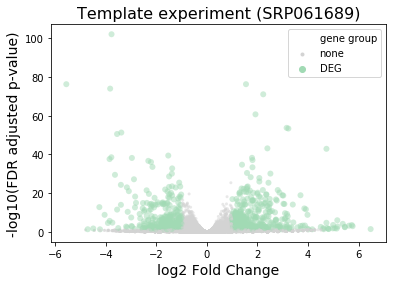

In [5]:
# Plot template volcano
plot.make_volcano_template_highlight_DEG(
    template_DE_stats_filename, 
    project_id, 
    pval_name,
    logFC_name,
    os.path.join(local_dir, f"template_volcano_DEG_{project_id}.svg"))

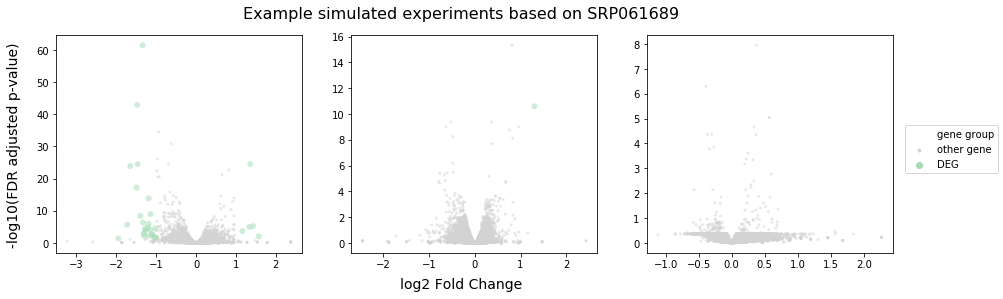

In [6]:
# Plot simulated volcanos
out_filename = "example_simulated_volcano.svg"
make_volcano_simulated_highlight_DEG_subset(
    simulated_DE_stats_dir, 
    project_id,
    3, 
    os.path.join(local_dir, f"simulated_volcano_DEG_{project_id}.svg")
    )

**Takeaway:**
* Simulated experiments have DEGs with a similar distribution of effect size changes (i.e. our simulation preserve the experimental design, so the "changes" are maintained)
* However, most DEGs in the simulated experiments are down-regulated compared to the template experiment where genes are equally split between up-regulated and down-regulated. This indicates the different biological patterns that are generated by the simulated (i.e. the simulated experiments are different experiments compared to the template). Furthermore, there are inter-simulated experiments differences in the volcano plot, indicating that these are distinct new experiments. 
* In both template and simulated experiments, DEGs are determines by p-value more than the log2 fold change (i.e minimally changed genes are signficant). This might suggest that very few genes were changed in this experiment? (Need to think about this more)

In [7]:
gene_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_gene_summary_{project_id}.tsv"
)

50


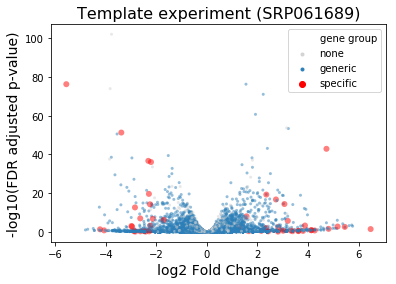

In [8]:
plot.make_volcano_template_highlight_generic_specific(
    gene_summary_filename,
    4500,
    50,
    template_DE_stats_filename,
    project_id,
    pval_name,
    logFC_name,
    os.path.join(local_dir,f"template_volcano_generic_specific_{project_id}.svg")
)

50


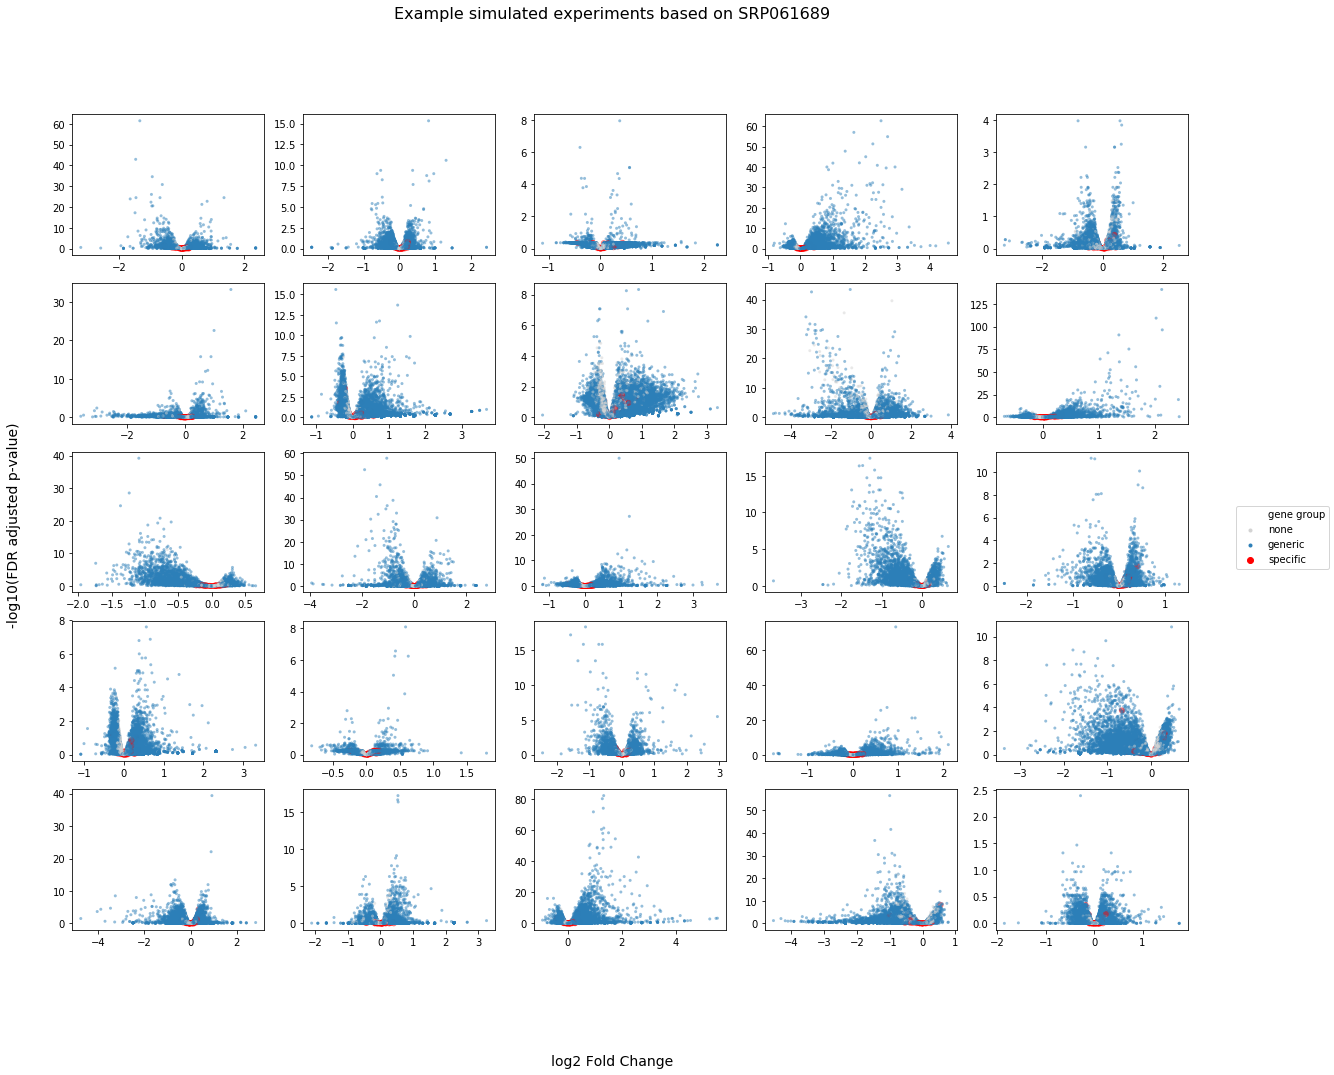

In [9]:
simulated_DE_stats_dir = os.path.join(local_dir, "DE_stats")

plot.make_volcano_simulated_highlight_generic_specific(
    gene_summary_filename,
    4500,
    50,
    simulated_DE_stats_dir,
    project_id,
    pval_name,
    logFC_name,
    num_simulated,
    5,
    5,
    20,
    15,
    os.path.join(local_dir,f"simulated_volcano_generic_specific_{project_id}.svg")
)

**Takeaway:**

In the template experiment, the generic (blue) and specific (red) genes are both found to be highly DE (i.e. the genes tend to be towards the tails of the plot). However in the simulated experiments, the generic genes (blue) are found to be highly DE across all simulated experiments whereas the specific genes (red) are found to be highly DE sometimes depending on the experiment.

These plots demonstrate that generic genes are consistently DE across multiple simulated experiments while specific genes depend on the context of the experiment.